## Imports

In [ ]:
from FraudDetector import Bank_Account_Fraud_Detection

# Reading Dataset

In [ ]:
# Load Base.csv
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Base')

0    1000000
Name: device_fraud_count, dtype: int64


# Get insight & Making Preprocessing


In [ ]:
fraud_detector.EDA('frauds')

In [ ]:
fraud_detector.preprocess('option1')

#With Feature Engineering

In [ ]:
fraud_detector2 = Bank_Account_Fraud_Detection('data/')
fraud_detector2.preprocess('option1', fet_eng=True)

## Model Creation
## Baseline Models
Trying some baseline models to estimate a baseline score. Note that class-wheights are set for all the models to achieve higher predictive equality

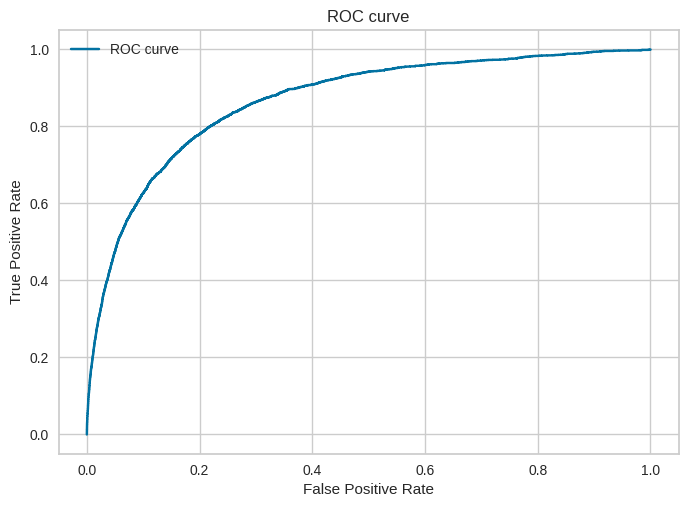

AUC: 0.8667999204055117
TPR:  47.5% 
FPR:  4.9799999999999995% 
Threshold:  0.79
Predictive Equality:  93.54%


In [ ]:
fraud_detector2.fit_baseline()

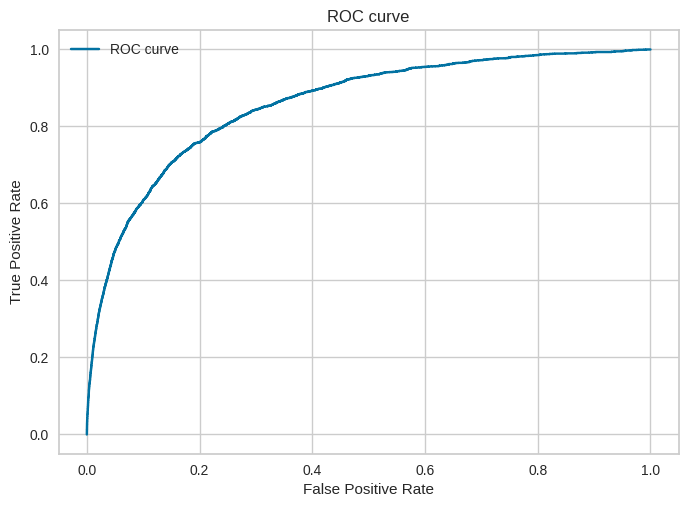

AUC: 0.8589535859268682
TPR:  47.71% 
FPR:  5.0% 
Threshold:  0.73
Predictive Equality:  78.48%


In [ ]:
fraud_detector2.fit_baseline('XGB')

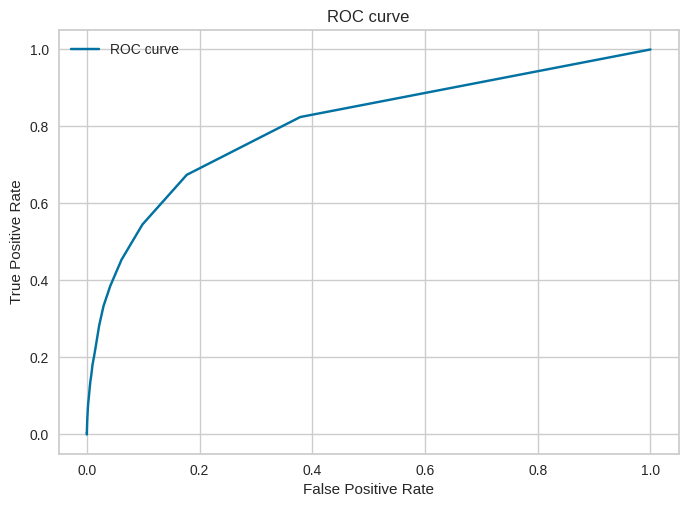

AUC: 0.8031937441391865
TPR:  38.6% 
FPR:  4.16% 
Threshold:  0.05
Predictive Equality:  27.889999999999997%


In [ ]:
fraud_detector2.fit_baseline('RF')

6407/6407 [==============================] - 14s 2ms/step


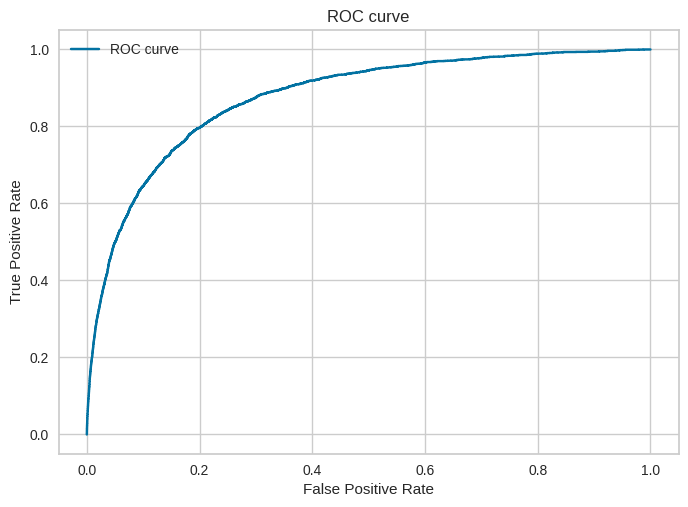

AUC: 0.8757211686219836
TPR:  49.9% 
FPR:  4.99% 
Threshold:  0.92
Predictive Equality:  95.19999999999999%


In [ ]:
fraud_detector2.fit_baseline('DNN')

# Without Feature Engineering

## Models Creation

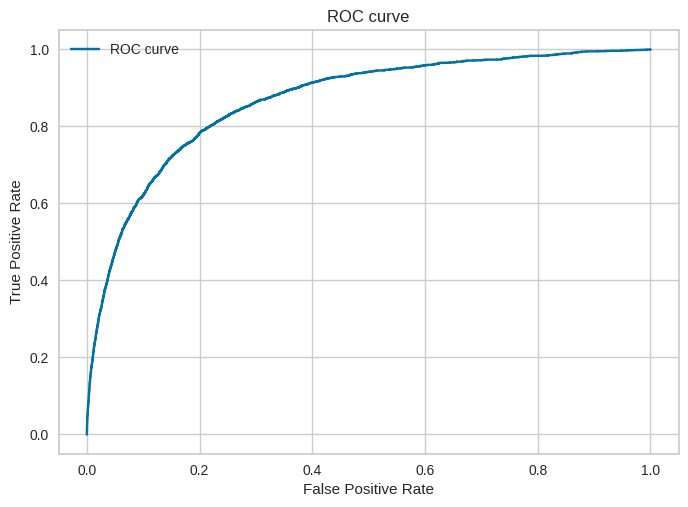

AUC: 0.8671955258048522
TPR:  47.32% 
FPR:  5.0% 
Threshold:  0.79
Predictive Equality:  93.84%


In [ ]:
fraud_detector.fit_baseline()

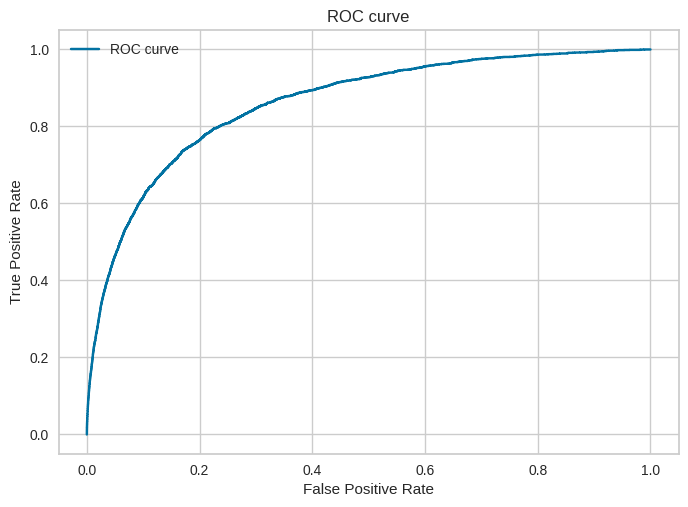

AUC: 0.860238917132933
TPR:  46.46% 
FPR:  5.0% 
Threshold:  0.72
Predictive Equality:  76.51%


In [ ]:
fraud_detector.fit_baseline('XGB')

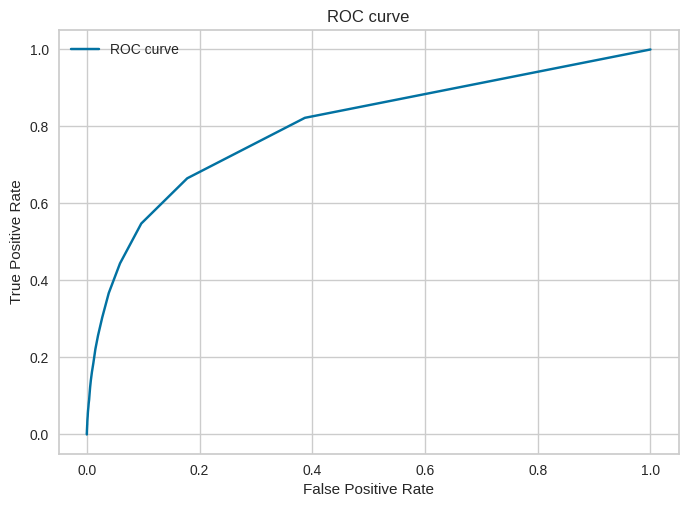

AUC: 0.7994194108849275
TPR:  36.730000000000004% 
FPR:  3.8899999999999997% 
Threshold:  0.05
Predictive Equality:  31.6%


In [ ]:
fraud_detector.fit_baseline('RF')

6407/6407 [==============================] - 15s 2ms/step


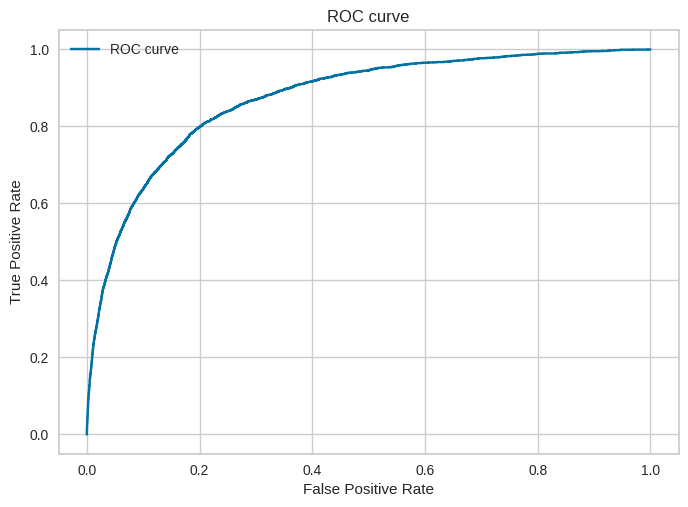

AUC: 0.8739477927596416
TPR:  48.89% 
FPR:  5.0% 
Threshold:  0.89
Predictive Equality:  98.24000000000001%


In [ ]:
fraud_detector.fit_baseline('DNN')

# Apply Preprocessing on Step 1

## Hyperparameter Tuning on Models

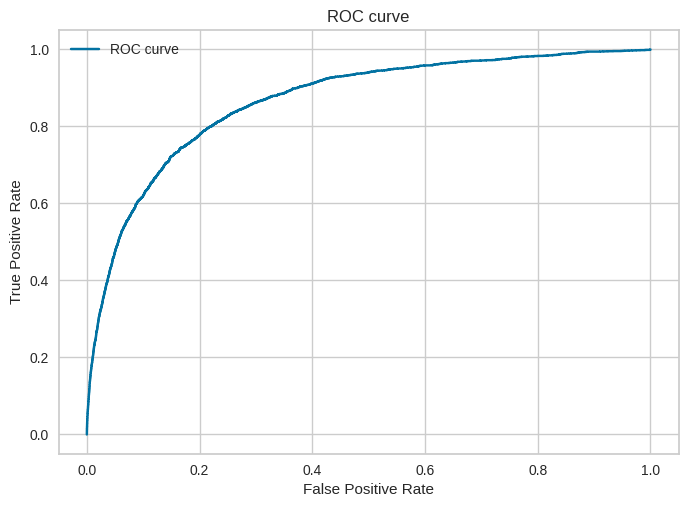

AUC: 0.8664313529151144
TPR:  47.46% 
FPR:  4.99% 
Threshold:  0.79
Predictive Equality:  93.94%


In [ ]:
fraud_detector.train_LR(
    solver='sag',
    penalty='l2',
    C=0.1,
    class_weight='balanced'
)

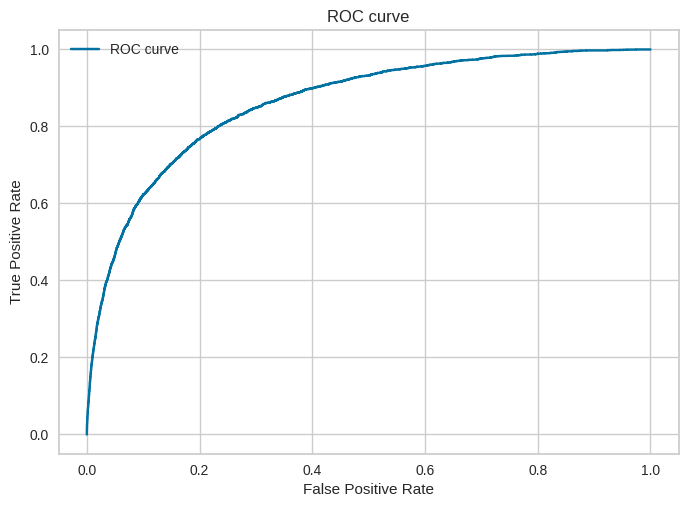

AUC: 0.8627053196904493
TPR:  46.63% 
FPR:  5.0% 
Threshold:  0.02
Predictive Equality:  29.04%


In [ ]:
fraud_detector.train_XGB(
    n_estimators=1000,
    max_depth=11,
    learning_rate=0.05,
    gamma=1
)

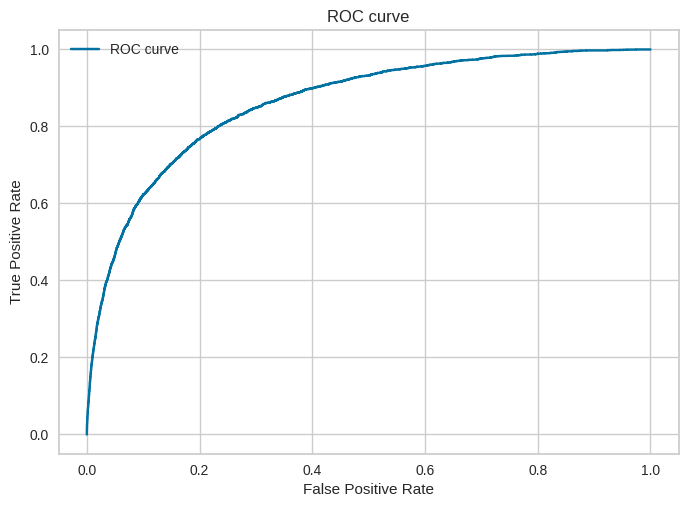

AUC: 0.8627053196904493
TPR:  46.63% 
FPR:  5.0% 
Threshold:  0.02
Predictive Equality:  29.04%


In [ ]:
fraud_detector.train_RF(n_estimators=100, max_features='log2', max_depth=10)

## Two Model with different Techiques

In [ ]:
fraud_detector3 = Bank_Account_Fraud_Detection('data/')
fraud_detector3.preprocess('option2')

X_train_df shape: (794989, 40)
y_train_series shape: (794989,)
train_df shape: (794989, 41)


### First Model (GBM)

In [ ]:
fraud_detector3.tune_GBM()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9898,0.8709,0.0175,0.6250,0.0341,0.0335,0.1035
1,0.9896,0.8782,0.0123,0.3500,0.0237,0.0230,0.0639
2,0.9898,0.8767,0.0211,0.5217,0.0405,0.0397,0.1033
3,0.9896,0.8944,0.0175,0.3226,0.0333,0.0323,0.0732
4,0.9898,0.8777,0.0175,0.5882,0.0341,0.0335,0.1003
5,0.9897,0.8614,0.0123,0.3889,0.0238,0.0232,0.0676
6,0.9897,0.8823,0.0105,0.4000,0.0205,0.0200,0.0635
7,0.9898,0.8741,0.0158,0.5294,0.0306,0.0300,0.0901
8,0.9897,0.8836,0.0105,0.4615,0.0205,0.0201,0.0685


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9898,0.8653,0.0210,0.6667,0.0407,0.0401,0.1172
1,0.9895,0.8743,0.0123,0.2800,0.0235,0.0226,0.0567
2,0.9897,0.8727,0.0228,0.4483,0.0434,0.0425,0.0993
3,0.9895,0.8888,0.0105,0.2500,0.0202,0.0194,0.0495
4,0.9896,0.8729,0.0158,0.3333,0.0302,0.0293,0.0707
5,0.9896,0.8582,0.0193,0.3793,0.0367,0.0358,0.0837
6,0.9896,0.8819,0.0175,0.3846,0.0335,0.0326,0.0803
7,0.9898,0.8717,0.0193,0.5500,0.0372,0.0366,0.1016
8,0.9896,0.8779,0.0140,0.3810,0.0270,0.0263,0.0715


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


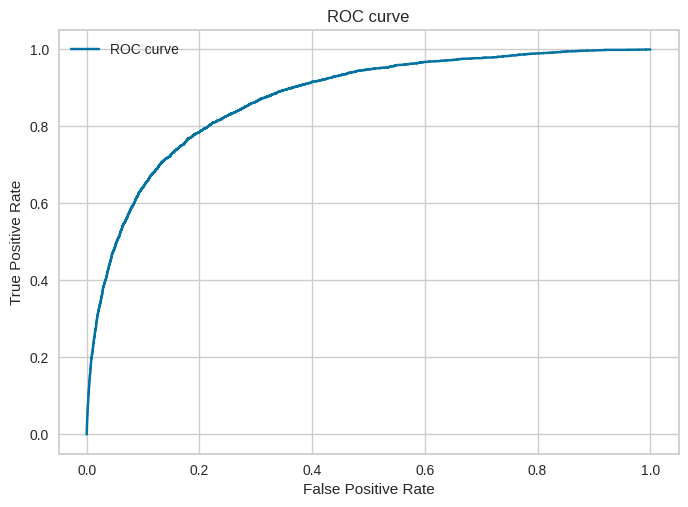

AUC: 0.8733078465902635
TPR:  48.58% 
FPR:  4.9799999999999995% 
Threshold:  0.03
Predictive Equality:  21.34%


In [ ]:
fraud_detector3.evaluate_GBM()

### Second Model (AdaBoost)

In [ ]:
fraud_detector3.tune_GBM('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9897,0.8712,0.0280,0.4571,0.0528,0.0517,0.1112
1,0.9897,0.8753,0.0298,0.4722,0.0560,0.0549,0.1166
2,0.9896,0.8772,0.0281,0.4000,0.0525,0.0512,0.1038
3,0.9896,0.8980,0.0193,0.3333,0.0365,0.0354,0.0782
4,0.9898,0.8759,0.0211,0.5000,0.0404,0.0396,0.1010
5,0.9896,0.8622,0.0175,0.3846,0.0336,0.0327,0.0804
6,0.9898,0.8829,0.0245,0.6087,0.0471,0.0464,0.1208
7,0.9898,0.8727,0.0280,0.5161,0.0532,0.0522,0.1185
8,0.9897,0.8858,0.0175,0.4762,0.0338,0.0331,0.0898


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9897,0.8276,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9897,0.8412,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9898,0.8430,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9898,0.8476,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9898,0.8402,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9898,0.8192,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9897,0.8434,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9897,0.8355,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9897,0.8506,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


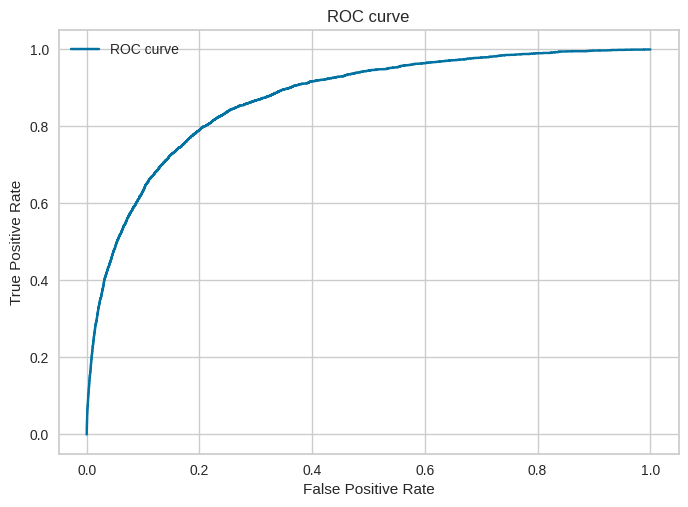

AUC: 0.8733564955737332
TPR:  48.4% 
FPR:  5.0% 
Threshold:  0.48
Predictive Equality:  100.0%


In [ ]:
fraud_detector3.evaluate_GBM()